In [1]:
using LinearAlgebra
using SparseArrays
using Statistics
import Laplacians as Lap
include("Laplacians.jl/src/Laplacians.jl")
import .Laplacians as LapM
import Random
using Plots
using BenchmarkTools

In [22]:
NUMNODES = 500000
a = Lap.pure_random_graph(NUMNODES)

500000×500000 SparseMatrixCSC{Float64, Int64} with 4000000 stored entries:
⣻⣾⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⡀⠀⠀⠙⢮
⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀
⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀
⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉
⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦⡀⠀
⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀⠙⢦
⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀⠀⠀
⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣿⣿⣦⡀
⡳⣄⠀⠀⠈⠳⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⡿⣯

In [23]:
Random.seed!(1234) # fix the seed
vecGetLDLi(mat) = LapM.approxChol(LapM.LLmatp(mat))
vecApplyLDLi(ldli, mat) = sparse(reduce(hcat, map(x -> LapM.LDLsolver(ldli, Vector(x)), eachcol(mat))))
vecApplyLDLiPartial(ldli, mat) = sparse(reduce(hcat, map(x -> LapM.LDLsolver(ldli, Vector(x)), eachcol(mat[:, 1:10]))))
vecLDL = vecGetLDLi(a)
vecLen = LapM.preprocessLDL(vecLDL)
vecLap = LapM.lap(a)
vecResult = vecApplyLDLiPartial(vecLDL, vecLap)

500000×10 SparseMatrixCSC{Float64, Int64} with 5000000 stored entries:
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿

Will use the `vecLDL` and `vecLap` above

In [24]:
# the analyzer
function analyzeForward(ldli)
    levelSets = Vector{Vector{Int64}}(undef, 0)
    numLevels = 0

    count = zeros(Int64, size(ldli.col, 1) + 1) # each entry for a row entry
    levels = ones(Int64, size(ldli.col, 1) + 1) # each entry for a row entry, all start with level 1

    for it in 1:length(ldli.col)
        i = ldli.col[it]
    
        j0 = ldli.colptr[it]
        j1 = ldli.colptr[it + 1] - 1
        
        for up in j0:j1
            uprow = ldli.rowval[up]
            if uprow != i # self edge should not count
                count[uprow] = count[uprow] + 1 # following iteration that depends need another update
                levels[uprow] = max(levels[uprow], levels[i] + 1)
            end
        end
        
        if levels[i] > numLevels
            numLevels = numLevels + 1
            push!(levelSets, [it]) # push the iteration number
        else
            push!(levelSets[levels[i]], it) # push the iteration number
        end
    end
    
    return levelSets, numLevels, count
end

analyzeForward (generic function with 1 method)

In [25]:
levelSets, numLevels, count = analyzeForward(vecLDL)

([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  227623, 227628, 227632, 227641, 227648, 227663, 227751, 227812, 227820, 227843], [13, 16, 22, 34, 43, 49, 60, 68, 71, 79  …  282914, 282923, 282964, 293031, 293062, 301807, 302479, 302526, 320135, 333562], [44, 61, 107, 167, 207, 240, 345, 353, 365, 490  …  320008, 320060, 333103, 335759, 335765, 335797, 335806, 335815, 335817, 349523], [544, 717, 905, 958, 1017, 1020, 1060, 1073, 1182, 1316  …  320087, 320148, 327129, 335443, 335644, 335760, 335829, 348602, 348828, 361513], [903, 1317, 1762, 2111, 2536, 3045, 3380, 3866, 3897, 4207  …  335601, 335615, 335741, 335745, 335761, 335789, 347369, 348648, 349500, 355074], [1514, 2724, 3238, 3867, 4375, 5034, 5350, 7099, 7478, 8001  …  338246, 341853, 341855, 345406, 347244, 347301, 347418, 348234, 349454, 349502], [4054, 5225, 5542, 8002, 8310, 8463, 8763, 9160, 9476, 9523  …  349303, 349361, 349464, 356632, 357787, 358012, 359659, 359662, 360538, 361441], [8178, 8485, 9821, 10517, 10717, 10725, 10804, 11

In [34]:
function LDLsolverAlt(ldli::LapM.LDLinv{Tind, Tval}, levelSets::Vector{Vector{Int64}}, b::Vector) where {Tind, Tval}
    y = copy(b)

    forwardAlt0!(ldli, levelSets, y)

    y ./= ldli.d

    backwardAlt0!(ldli, levelSets, y)

    y .-= mean(y)

    return y
end

vecApplyLDLiAltPartial(ldli, levelSets, mat) = sparse(reduce(hcat, map(x -> LDLsolverAlt(ldli, levelSets, Vector(x)), eachcol(mat[:, 1:10]))))

# the 0 version, execute level by level
function forwardAlt0!(ldli::LapM.LDLinv{Tind,Tval}, levelSets::Vector{Vector{Int64}}, y::Vector) where {Tind,Tval}

    o = one(Tind)
    @inbounds for levelSet in levelSets
        for ii in levelSet
            i = ldli.col[ii] # for every elems in ldli.col
            # the loop processing y from 1 to the second last row

            j0 = ldli.colptr[ii]
            j1 = ldli.colptr[ii+1]-one(Tind)

            yi = y[i] # the element of y in that row

            ############################
            toStore = ldli.fval[j0:j1] .* yi # vectorized load & multiplication

            for i in 1:(j1 - j0 + 1) # gather then scatter
              y[ldli.rowval[j0 + i - 1]] += toStore[i]
            end

            y[i] = yi * ldli.fval[j1] # the loop end to avoid an extra multiplication
        end
    end
end

# the 1 version, try to use multithreads to mimic the hardware reordering
function forwardAlt1!(ldli::LapM.LDLinv{Tind,Tval}, levelSets::Vector{Vector{Int64}}, y::Vector) where {Tind,Tval}

    o = one(Tind)
    @inbounds for levelSet in levelSets
        lenSet = length(levelSet)
        largeSplits = lenSet ÷ 64
        remainStart = largeSplits * 64 + 1
        
        for sp in 0:(largeSplits-1)
            Threads.@threads for idx in 1:64
                ii = levelSet[sp * 64 + idx] # calculate the idx && get iteration
                
                i = ldli.col[ii] # for every elems in ldli.col
                # the loop processing y from 1 to the second last row

                j0 = ldli.colptr[ii]
                j1 = ldli.colptr[ii+1]-one(Tind)

                yi = y[i] # the element of y in that row

                ############################
                toStore = ldli.fval[j0:j1] .* yi # vectorized load & multiplication

                for i in 1:(j1 - j0 + 1) # gather then scatter
                  y[ldli.rowval[j0 + i - 1]] += toStore[i]
                end

                y[i] = yi * ldli.fval[j1] # the loop end to avoid an extra multiplication                
            end
        end
        
        
        
        for idx in remainStart:lenSet
            ii = levelSet[idx]
            
            i = ldli.col[ii] # for every elems in ldli.col
            # the loop processing y from 1 to the second last row

            j0 = ldli.colptr[ii]
            j1 = ldli.colptr[ii+1]-one(Tind)

            yi = y[i] # the element of y in that row

            ############################
            toStore = ldli.fval[j0:j1] .* yi # vectorized load & multiplication

            for i in 1:(j1 - j0 + 1) # gather then scatter
              y[ldli.rowval[j0 + i - 1]] += toStore[i]
            end

            y[i] = yi * ldli.fval[j1] # the loop end to avoid an extra multiplication
        end
    end
end

function backwardAlt!(ldli::LapM.LDLinv{Tind,Tval}, y::Vector) where {Tind,Tval}
    o = one(Tind)
    @inbounds for ii in length(ldli.col):-1:1
        i = ldli.col[ii]

        j0 = ldli.colptr[ii]
        j1 = ldli.colptr[ii+1]-o

        yi = y[i]

        ############################
        ys = [y[j] for j in ldli.rowval[j0:j1]] # a gather

        partials = ldli.fval[j0:j1] .* ys # vectorized multiplication

        integral = sum(partials) # reduction
        integral += yi * ldli.fval[j1]

        y[i] = integral
    end
end

# This version is an exact reverse of the forward pass, notice that here only one level set is necessary
function backwardAlt0!(ldli::LapM.LDLinv{Tind,Tval}, levelSets::Vector{Vector{Int64}}, y::Vector) where {Tind,Tval}
    o = one(Tind)
    @inbounds for levelIdx in length(levelSets):-1:1
        for ii in levelSets[levelIdx]
            i = ldli.col[ii]

            j0 = ldli.colptr[ii]
            j1 = ldli.colptr[ii+1]-o

            yi = y[i]

            ############################
            ys = [y[j] for j in ldli.rowval[j0:j1]] # a gather

            partials = ldli.fval[j0:j1] .* ys # vectorized multiplication

            integral = sum(partials) # reduction
            integral += yi * ldli.fval[j1]

            y[i] = integral
        end
    end
end

backwardAlt0! (generic function with 1 method)

In [35]:
vecResultAlt = vecApplyLDLiAltPartial(vecLDL, levelSets, vecLap)

500000×10 SparseMatrixCSC{Float64, Int64} with 5000000 stored entries:
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿
⣿

In [36]:
vecResultAlt ≈ vecResult

true

In [37]:
maximum(abs.(vecResultAlt - vecResult))

2.220446049250313e-16

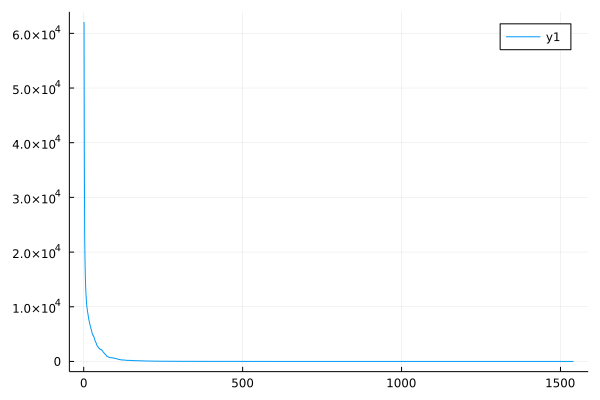

In [26]:
numAtLevel = [length(l) for l in levelSets]
plot(1:numLevels, numAtLevel)

In [18]:
17793 ÷ 64

278

In [15]:
collect(1:64:17792)

278-element Vector{Int64}:
     1
    65
   129
   193
   257
   321
   385
   449
   513
   577
   641
   705
   769
     ⋮
 17025
 17089
 17153
 17217
 17281
 17345
 17409
 17473
 17537
 17601
 17665
 17729

In [19]:
collect(0:63)

64-element Vector{Int64}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
  ⋮
 52
 53
 54
 55
 56
 57
 58
 59
 60
 61
 62
 63